# Review: computer vision transfer learning 

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

### Data 

In [4]:
path = untar_data(URLs.PETS)
path_anno = path/'annotations'
path_img = path/'images'
np.random.seed(2)
fnames = get_image_files(path_img)
fnames[0]

PosixPath('/home/ricky/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_27.jpg')

In [5]:
import re

In [11]:
pat = r'/'
x = re.compile(pat)
x.findall(str(fnames[0]))

['/', '/', '/', '/', '/', '/', '/']

In [12]:
pat = r'/[^/]'
x = re.compile(pat)
x.findall(str(fnames[0]))

['/h', '/r', '/.', '/d', '/o', '/i', '/w']

In [13]:
pat = r'/([^/])'
x = re.compile(pat)
x.findall(str(fnames[0]))

['h', 'r', '.', 'd', 'o', 'i', 'w']

In [14]:
pat = r'/([^/]+)'
x = re.compile(pat)
x.findall(str(fnames[0]))

['home',
 'ricky',
 '.fastai',
 'data',
 'oxford-iiit-pet',
 'images',
 'wheaten_terrier_27.jpg']

In [15]:
pat = r'/([^/]+)_\d'
x = re.compile(pat)
x.findall(str(fnames[0]))

['wheaten_terrier']

In [16]:
pat = r'/([^/]+)_\d+.jpg'
x = re.compile(pat)
x.findall(str(fnames[0]))

['wheaten_terrier']

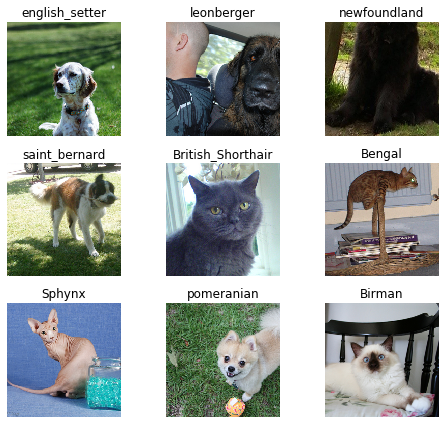

In [24]:
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                 size=224, bs=bs).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

### Training 

In [25]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [26]:
learn.fit_one_cycle(4)

epoch     train_loss  valid_loss  error_rate  time    
0         1.357731    0.318125    0.100135    00:31     
1         0.603137    0.271552    0.083897    00:31     
2         0.383034    0.258687    0.078484    00:31     
3         0.271614    0.252101    0.079838    00:31     


In [27]:
learn.save('stage-1')

In [28]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch     train_loss  valid_loss  error_rate  time    
0         0.259402    0.238988    0.074425    00:41     
1         0.212188    0.234833    0.075778    00:41     


In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Birman', 'Ragdoll', 5),
 ('Ragdoll', 'Birman', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Persian', 'Ragdoll', 4),
 ('boxer', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('Birman', 'Siamese', 2),
 ('Siamese', 'Birman', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('miniature_pinscher', 'beagle', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'beagle', 2)]